# Universidade de Brasília
## Instituto de Física
---
### Métodos Computacionais A (MCA) - Prof. Bernhard Enders
---

## **➲ AULA: Interpolação**

### O que é interpolar?

Em matemática, denomina-se interpolação o método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos.

Em pesquisa científica, geralmente dispomos de dados pontuais obtidos a partir de uma amostragem/experimento. Tal conjunto de dados pontuais (também denominado conjunto discreto) não possui continuidade e, muita vez, não atende a todo o espectro que pretendemos investigar.

Interpolar significa construir uma função que se "encaixe" aproximadamente em nossos dados experimentais (pontos discretos), conferindo-lhes, então, a continuidade e o alcance desejados.

### Interpolação Linear

É a forma mais básica (e óbvia) de se interpolar dois pontos (ou vários pontos dois a dois). 

Se os dois pontos conhecidos são dados pelas coordenadas $(x_{0},y_{0})$ e $(x_{1},y_{1})$, o interpolante linear é a linha reta entre esses pontos. Para um valor $x$ no intervalo, o valor $y$ ao longo da linha reta é dado pela solução da equação das inclinações abaixo (já que as inclinações devem ser iguais):



$${\displaystyle {\frac {y-y_{0}}{x-x_{0}}}={\frac {y_{1}-y_{0}}{x_{1}-x_{0}}},}$$

Resolver esta equação para $y$, que é o valor desconhecido em $x$, é igual a

$$
{\displaystyle y=y_{0}+(x-x_{0}){\frac {y_{1}-y_{0}}{x_{1}-x_{0}}}={\frac {y_{0}(x_{1}-x)+y_{1}(x-x_{0})}{x_{1}-x_{0}}},}
$$

que é a fórmula para interpolação linear no intervalo ${\displaystyle (x_{0},x_{1})}$. Veremos (mais adiante) que este é exatamente o polinômio interpolador de Lagrange linear que passa pelos dois pontos $(x_{0},y_{0})$ e $(x_{1},y_{1})$.

### Polinômios de Lagrange

Outra maneira clássica de resolver o problema da interpolação polinomial é através dos polinômios de Lagrange. Dado um conjunto de pontos $\{x_j\}_{j=1}^n$ distintos dois a dois, definimos os polinômios de Lagrange como os polinômios de grau $n-1$ que satisfazem
\begin{equation}
L_k(x_j)=\left\{\begin{array}{rl}
1,& \text{se }k=j\\
0,& \text{se }k\neq j
\end{array}
\right.
\end{equation}
Assim, o polinômio $p(x)$ de grau $n-1$ que interpola os pontos dados, isto é, $p(x_j)=y_j, j=1,\ldots,n$ é dado por
\begin{equation}
  p(x)=y_1L_1(x)+y_2L_2(x)+\cdots +y_nL_n(x)=\sum_{k=1}^n y_k L_k(x).
\end{equation}

Para construir os polinômios de Lagrange, podemos analisar a sua forma fatorada, ou seja:
\begin{equation} L_k(x)=c_k\prod_{\substack{j=1\\j\ne k}}^{n} (x-x_j) \end{equation}
onde o coeficiente $c_k$ é obtido da condição $L_k(x_k)=1$:
\begin{equation} L_k(x_k)=c_k\prod_{\substack{j=1\\j\ne k}}^{n} (x_k-x_j) \Longrightarrow  c_k=\frac{1}{\displaystyle \prod_{\substack{j=1\\j\ne k}}^{n} (x_k-x_j)} \end{equation}
Portanto,
\begin{equation} L_k(x)=\prod_{\substack{j=1\\j\ne k}}^{n} \frac{(x-x_j)}{(x_k-x_j)} \end{equation}


#### Exemplo: 

Encontre o polinômio da forma $p(x)=a_1+a_2x+a_3x^2+a_4x^3$ que passa pelos pontos $(0, 0)$, $(1, 1)$, $(2, 4)$, $(3, 9)$.

Escrevemos:
\begin{eqnarray}
  L_1(x)&=& \frac{(x-1)(x-2)(x-3)}{(0-1)(0-2)(0-3)}=-\frac{1}{6}x^3+x^2-\frac{11}{6}x+1\\
  L_2(x)&=& \frac{x(x-2)(x-3)}{1(1-2)(1-3)}=\frac{1}{2}x^3-\frac{5}{2}x^2+3x\\
  L_3(x)&=& \frac{x(x-1)(x-3)}{2(2-1)(2-3)}=-\frac{1}{2}x^3+2x^2-\frac{3}{2}x\\
  L_4(x)&=& \frac{x(x-1)(x-2)}{3(3-1)(3-2)}=\frac{1}{6}x^3-\frac{1}{2}x^2+\frac{1}{3}x
\end{eqnarray}
Assim, temos:
\begin{equation}
  P(x)=0\cdot L_1(x)+1\cdot L_2(x)+4\cdot L_3(x)+9\cdot L_4(x)=x^2
\end{equation}

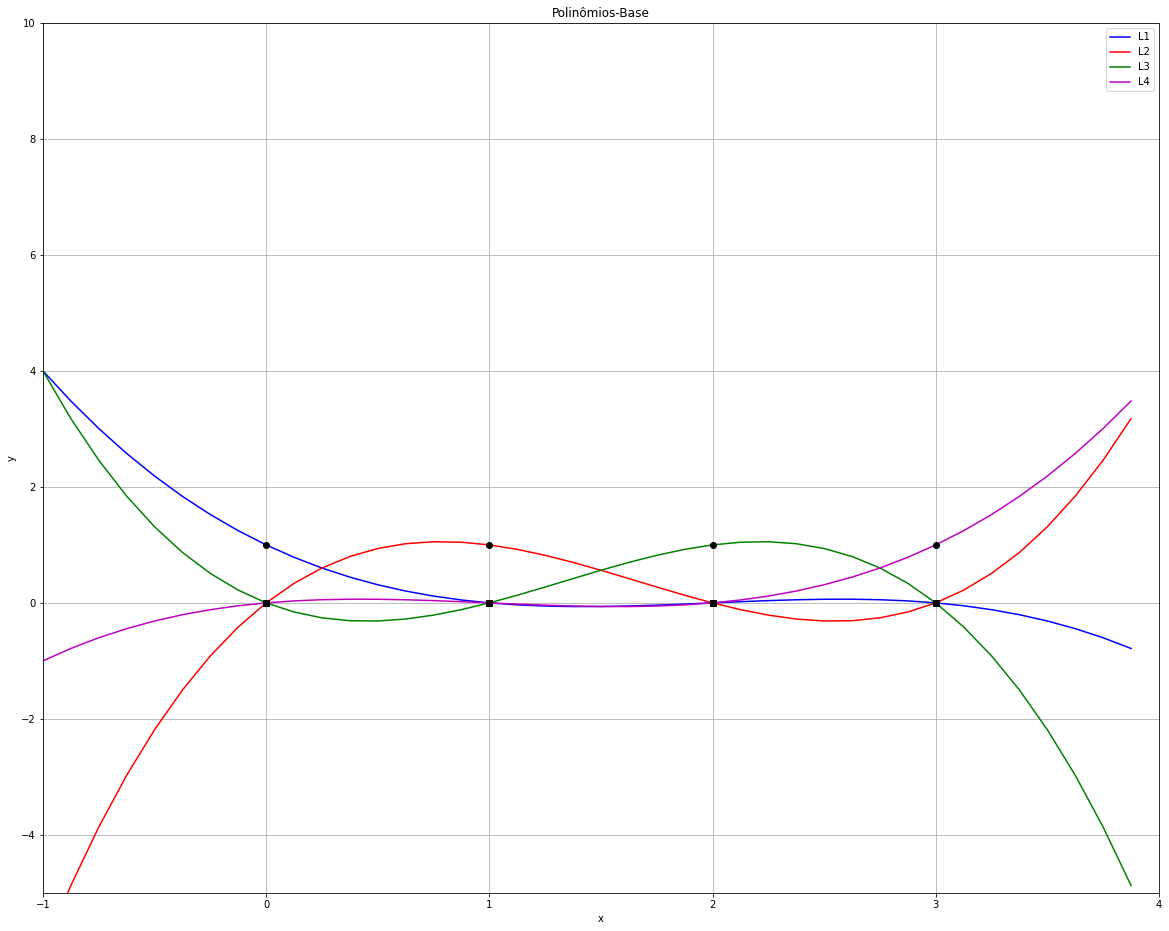

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

from scipy.interpolate import lagrange


# pontos
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]

# coeficientes 
L1c = [1., -11./6, 1., -1./6]
L2c = [0., 3., -5./2, 0.5]
L3c = [0., -3./2, 2., -0.5]
L4c = [0., 1./3, -0.5, 1./6]

# polinômios 
L1 = poly.Polynomial(L1c)
L2 = poly.Polynomial(L2c)
L3 = poly.Polynomial(L3c)
L4 = poly.Polynomial(L4c)

# abscissas 
x_new = np.arange(-1.0, 4, 0.125)

# gráfico de cada um dos polinômios 
fig = plt.figure(figsize = (20,16))
plt.plot(x_new, L1(x_new), "b", label = "L1")
plt.plot(x_new, L2(x_new), "r", label = "L2")
plt.plot(x_new, L3(x_new), "g", label = "L3")
plt.plot(x_new, L4(x_new), "m", label = "L4")
plt.plot(x, np.ones(len(x)), "ko", x,np.zeros(len(x)), "ks")
plt.title("Polinômios-Base")
plt.xlabel("x")
plt.ylabel("y")
plt.axis([-1, 4, -5, 10])
plt.grid()
plt.legend()
plt.show()

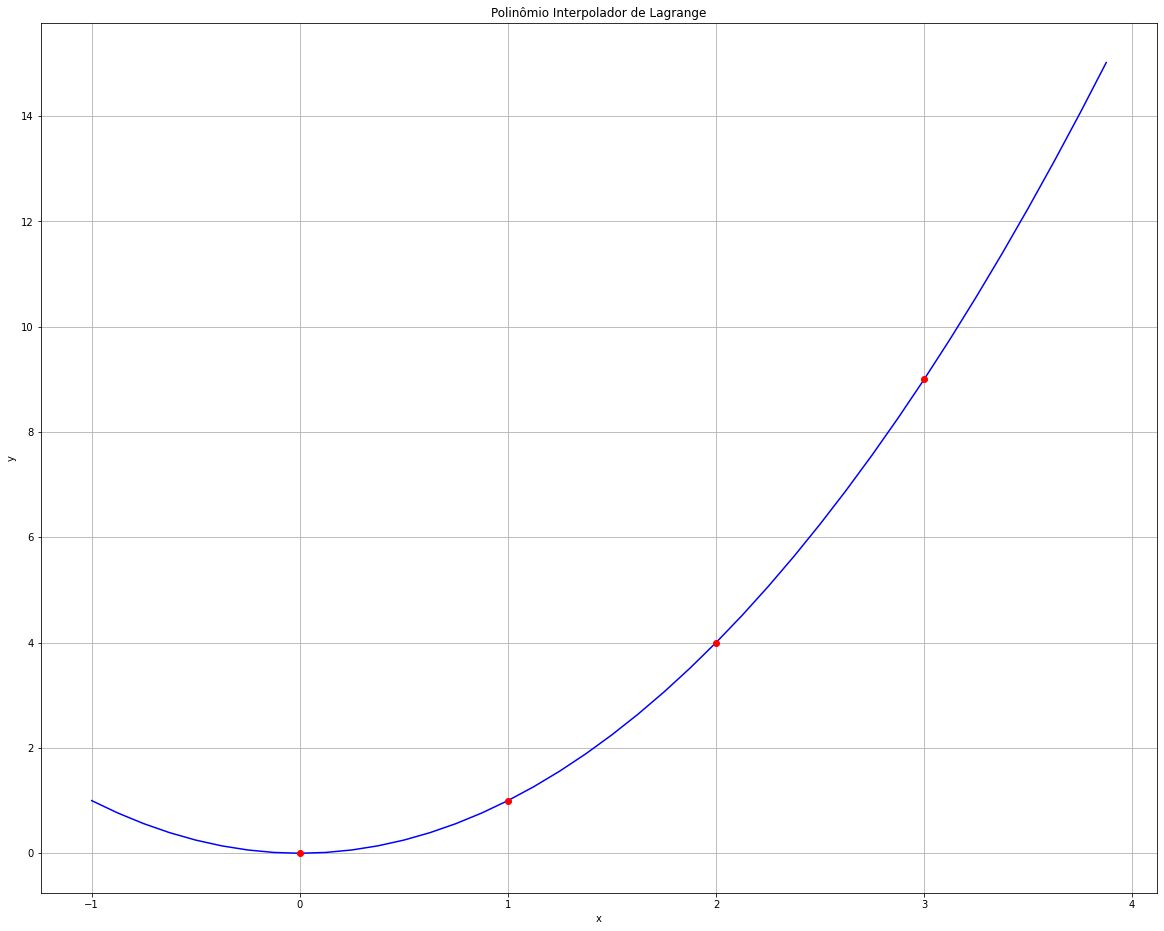

In [34]:
# gráfico do polinômio interpolador de Lagrange
P = 0*L1 + 1*L2 + 4*L3 + 9*L4

fig = plt.figure(figsize = (20,16))
plt.plot(x_new, P(x_new), "b", x, y, "ro")
plt.title("Polinômio Interpolador de Lagrange")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

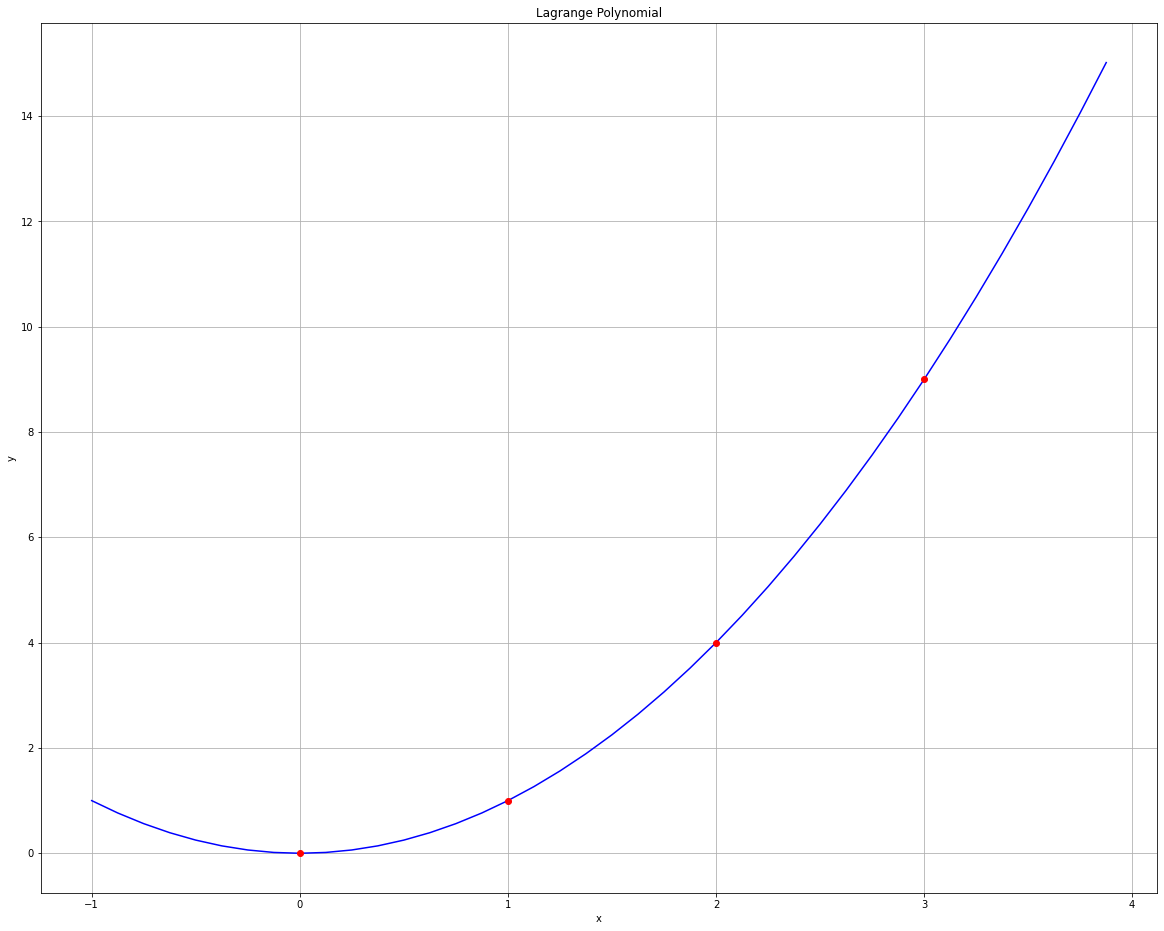

In [35]:
# usando o numpy
f = lagrange(x, y)
fig = plt.figure(figsize = (20,16))
plt.plot(x_new, f(x_new), "b", x, y, "ro")
plt.title("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()